In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from random import randrange, uniform
import math
import random

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
petal_len_width = iris.data[:, 2:]  # last two columns: petal length (cm) and petalwidth (cm)

Text(0, 0.5, 'Petal width')

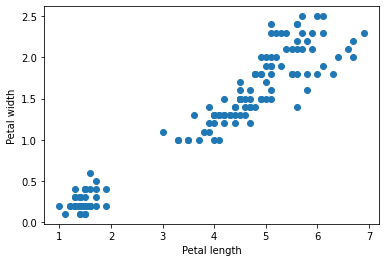

In [7]:
plt.scatter(petal_len_width[:, 0], petal_len_width[:, 1])
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [8]:
min(petal_len_width[:, 0]), max(petal_len_width[:, 0])

(1.0, 6.9)

In [9]:
min(petal_len_width[:, 1]), max(petal_len_width[:, 1])

(0.1, 2.5)

In [10]:
def random_start():
    random_petal_len = round(uniform(min(petal_len_width[:, 0]), max(petal_len_width[:, 0])), 1)
    random_petal_width = round(uniform(min(petal_len_width[:, 1]), max(petal_len_width[:, 1])), 1)
    return random_petal_len, random_petal_width

In [11]:
random.seed(170)
r1 = random_start()
r2 = random_start()
r3 = random_start()

In [12]:
r1,r2,r3

((5.6, 2.3), (4.5, 0.9), (2.4, 0.7))

Text(0, 0.5, 'Petal width')

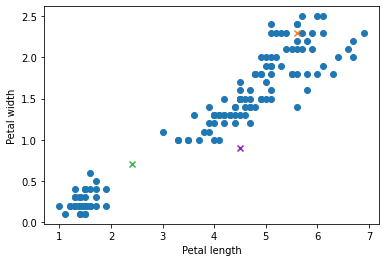

In [13]:
plt.scatter(petal_len_width[:, 0], petal_len_width[:, 1])
plt.scatter(r1[0], r1[1], marker='x', c='#f58231')
plt.scatter(r2[0], r2[1], marker='x', c='#911eb4')
plt.scatter(r3[0], r3[1], marker='x', c='#3cb44b')
plt.xlabel("Petal length")
plt.ylabel("Petal width")

In [14]:
dist = math.sqrt(pow(r1[0] - petal_len_width[0, 0], 2)+pow(r1[1] - petal_len_width[0, 1], 2))

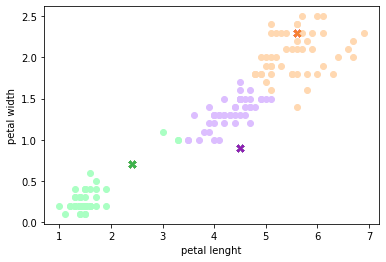

Apricot cluster centroid movement: 0.041999999999999815 0.266
Mint cluster centroid movement: 0.17872340425531963 -0.43617021276595735
Lavender cluster centroid movement: 0.8396226415094339 0.409433962264151


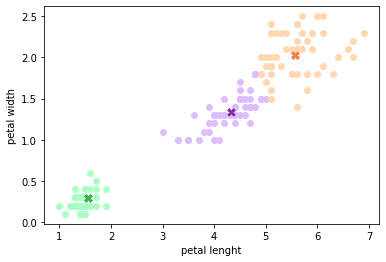

Apricot cluster centroid movement: -0.018530612244902045 -0.0017142857142875556
Mint cluster centroid movement: 0.027337201805287314 -0.003223726627982204
Lavender cluster centroid movement: 0.04775599926726404 0.021633998900897677


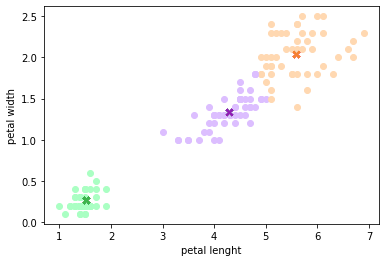

Apricot cluster centroid movement: -0.006346100083868933 -0.0005870841487274348
Mint cluster centroid movement: 0.0085089303632353 -0.0010034115994388415
Lavender cluster centroid movement: 0.016542927850752065 0.007494130338219163


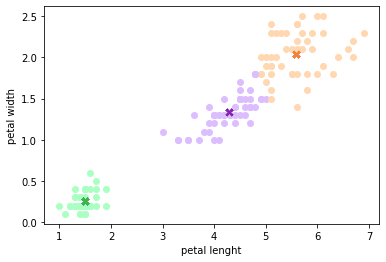

Apricot cluster centroid movement: -0.0032057618980374514 -0.00029656828131674473
Mint cluster centroid movement: 0.004149675398818609 -0.0004893485140122777
Lavender cluster centroid movement: 0.008393702308509665 0.003802440516436134


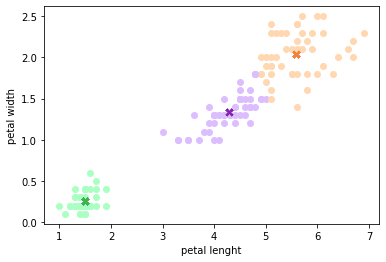

Apricot cluster centroid movement: -0.0019340546988111385 -0.0001789213598026862
Mint cluster centroid movement: 0.002457258765575787 -0.0002897710808460463
Lavender cluster centroid movement: 0.005076033411866243 0.002299499600848798


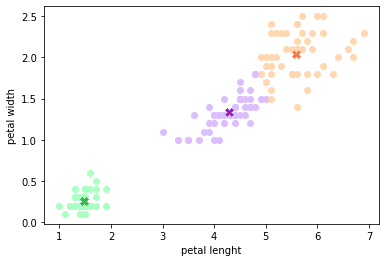

Apricot cluster centroid movement: -0.0012938159019642015 -0.00011969222000285384
Mint cluster centroid movement: 0.001624832343360083 -0.00019160758766045838
Lavender cluster centroid movement: 0.003400774860095268 0.0015405888414927182


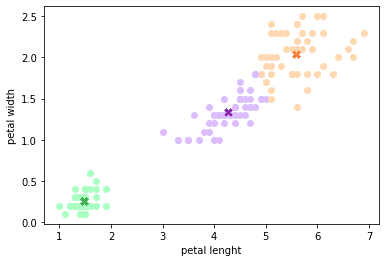

Apricot cluster centroid movement: -0.0009263415629439109 -8.569679657055573e-05
Mint cluster centroid movement: 0.0011541288232779223 -0.000136100097084757
Lavender cluster centroid movement: 0.0024373825484533818 0.0011041614076420792


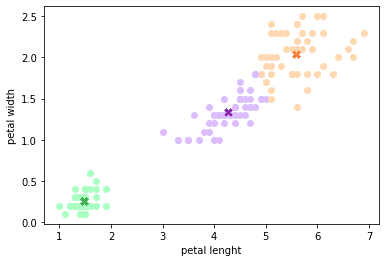

Apricot cluster centroid movement: -0.0006959560965116296 -6.438360364091622e-05
Mint cluster centroid movement: 0.00086208649329933 -0.0001016611430773029
Lavender cluster centroid movement: 0.0018325729830805937 0.000830175946688716


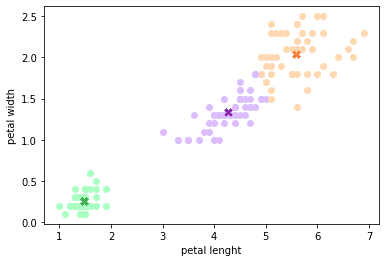

Apricot cluster centroid movement: -0.0005420118908325833 -5.014206919495834e-05
Mint cluster centroid movement: 0.0006684428749350602 -7.882581072227168e-05
Lavender cluster centroid movement: 0.0014280314857118004 0.0006469141483026464


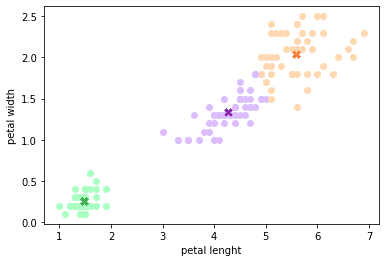

Apricot cluster centroid movement: -0.0004340593150642391 -4.015526703193828e-05
Mint cluster centroid movement: 0.0005334563526169234 -6.290758875104885e-05
Lavender cluster centroid movement: 0.001144128605848671 0.0005183029856182797


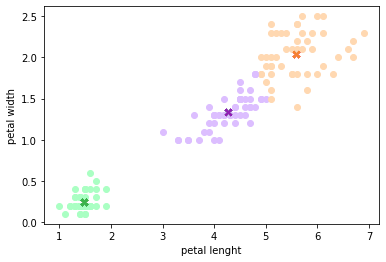

Apricot cluster centroid movement: -0.0003554372504490644 -3.288186017380568e-05
Mint cluster centroid movement: 0.0004356089792985074 -5.13689834071851e-05
Lavender cluster centroid movement: 0.0009372337404147668 0.0004245773101000383


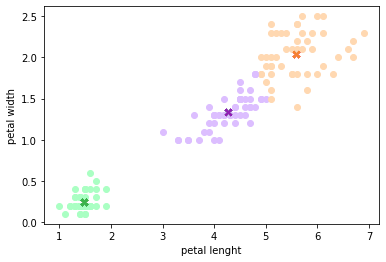

Apricot cluster centroid movement: -0.00029640268982156215 -2.7420513154741144e-05
Mint cluster centroid movement: 0.0003624210409345352 -4.273833029833085e-05
Lavender cluster centroid movement: 0.0007818052594175118 0.00035416647923777744


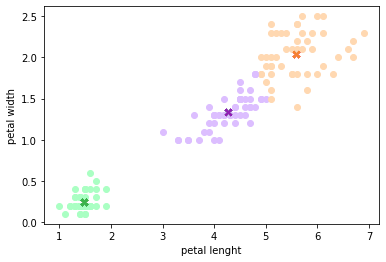

Apricot cluster centroid movement: -0.00025094796422475696 -2.321545043493245e-05
Mint cluster centroid movement: 0.0003062484801938936 -3.6114207569326595e-05
Lavender cluster centroid movement: 0.000662080104835816 0.0002999296524019701


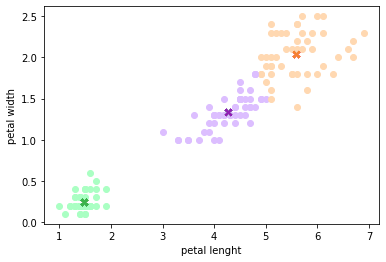

Apricot cluster centroid movement: -0.00021520463400914736 -1.990879874069762e-05
Mint cluster centroid movement: 0.00026219614002798153 -3.0919356134972986e-05
Lavender cluster centroid movement: 0.0005679008580592448 0.0002572654059720958


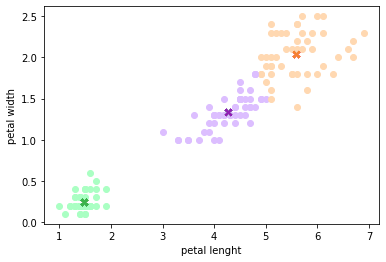

Apricot cluster centroid movement: -0.00018659016743782786 -1.726164544546549e-05
Mint cluster centroid movement: 0.00022701110962408677 -2.6770178020996127e-05
Lavender cluster centroid movement: 0.0004924824174132869 0.000223100013412747


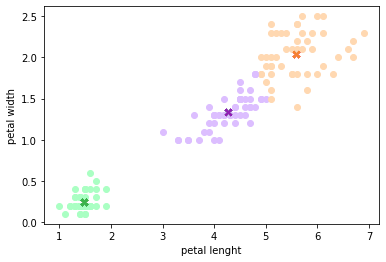

Apricot cluster centroid movement: -0.00016332697773435711 -1.5109544195368585e-05
Mint cluster centroid movement: 0.00019846315871596687 -2.3403674376698547e-05
Lavender cluster centroid movement: 0.0004311521039124244 0.00019531669916456051


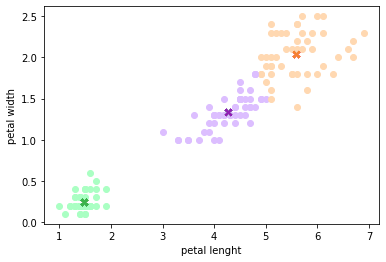

Apricot cluster centroid movement: -0.00014415901946840393 -1.3336296954324922e-05
Mint cluster centroid movement: 0.0001749817383442931 -2.0634638955741025e-05
Lavender cluster centroid movement: 0.00038060672244544236 0.00017241907909837373


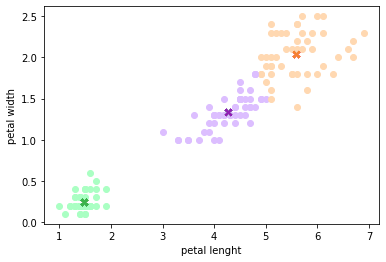

Apricot cluster centroid movement: -0.00012817834294587271 -1.1857908377876925e-05
Mint cluster centroid movement: 0.00015543490613456612 -1.8329587987420126e-05
Lavender cluster centroid movement: 0.0003384575837470649 0.0001533250504053285


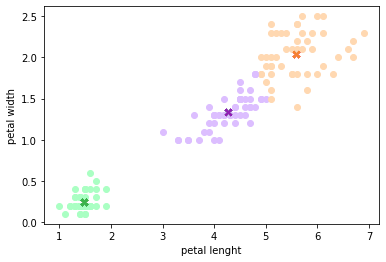

Apricot cluster centroid movement: -0.00011471540977048278 -1.061243878863749e-05
Mint cluster centroid movement: 0.00013899011443729847 -1.639034368361436e-05
Lavender cluster centroid movement: 0.0003029426221787812 0.00013723637774998299


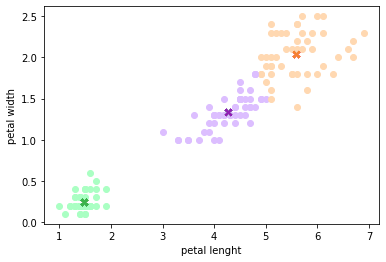

Apricot cluster centroid movement: -0.00010326771815005742 -9.553401238093784e-06
Mint cluster centroid movement: 0.00012502395801217148 -1.474339127494062e-05
Lavender cluster centroid movement: 0.0002727389709147321 0.00012355378774500658


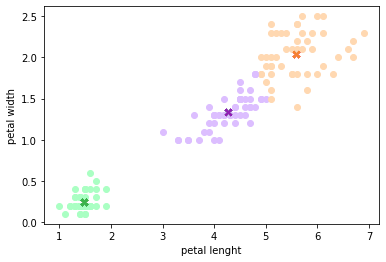

Apricot cluster centroid movement: -9.345217266343298e-05 -8.645355180636471e-06
Mint cluster centroid movement: 0.00011306214418116411 -1.3332800021359503e-05
Lavender cluster centroid movement: 0.00024683783407564164 0.00011182028463530003


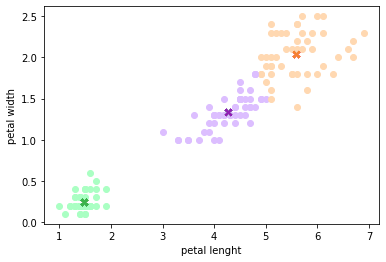

Apricot cluster centroid movement: -8.497258043593803e-05 -7.860899513989494e-06
Mint cluster centroid movement: 0.00010273864725895976 -1.211540651624432e-05
Lavender cluster centroid movement: 0.0002244590639872701 0.00010168245284608579


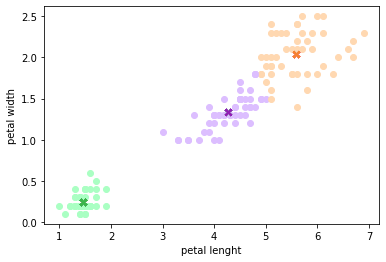

Apricot cluster centroid movement: -7.759702191822981e-05 -7.178579122246731e-06
Mint cluster centroid movement: 9.376734640742512e-05 -1.1057470094888444e-05
Lavender cluster centroid movement: 0.00020499166901855048 9.286350637202623e-05


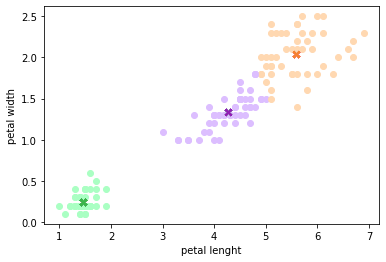

Apricot cluster centroid movement: -7.114181038847534e-05 -6.581400963323603e-06
Mint cluster centroid movement: 8.592196907297733e-05 -1.0132307673771379e-05
Lavender cluster centroid movement: 0.00018795163003137993 8.514417915905792e-05


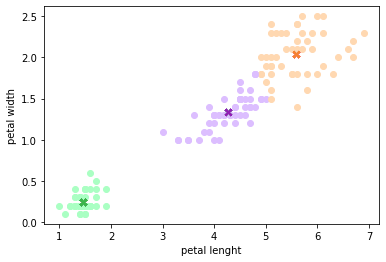

Apricot cluster centroid movement: -6.545993534956551e-05 -6.0557649459447305e-06
Mint cluster centroid movement: 7.902167194195897e-05 -9.318593389373575e-06
Lavender cluster centroid movement: 0.00017295149994089876 7.834895336822356e-05


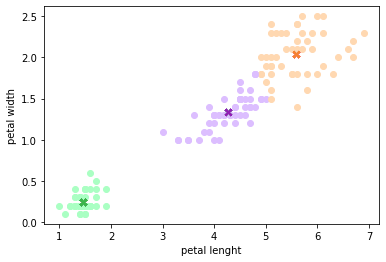

Apricot cluster centroid movement: -6.043261231436503e-05 -5.590682198519659e-06
Mint cluster centroid movement: 7.292051835605662e-05 -8.599117730323513e-06
Lavender cluster centroid movement: 0.00015967816917039634 7.233598687797493e-05


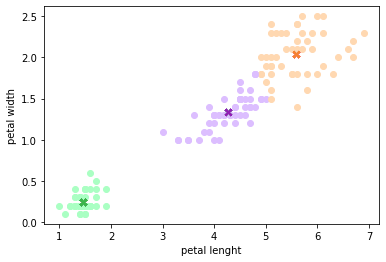

Apricot cluster centroid movement: -5.596302003318954e-05 -5.177195687267044e-06
Mint cluster centroid movement: 6.749969354480356e-05 -7.959869521956264e-06
Lavender cluster centroid movement: 0.0001478763828310914 6.698964638437999e-05


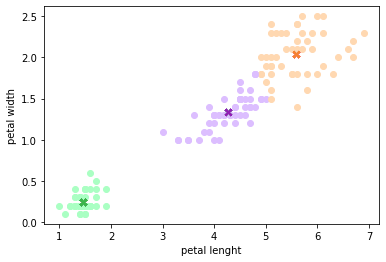

Apricot cluster centroid movement: -5.197160106984455e-05 -4.8079454750826756e-06
Mint cluster centroid movement: 6.26616727821272e-05 -7.389348205100177e-06
Lavender cluster centroid movement: 0.00013733636979962327 6.22149032351027e-05


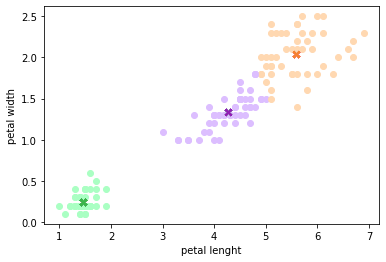

Apricot cluster centroid movement: -4.83924951142356e-05 -4.476838756151125e-06
Mint cluster centroid movement: 5.832580187714598e-05 -6.878042674296481e-06
Lavender cluster centroid movement: 0.00012788445171274532 5.79330791996846e-05


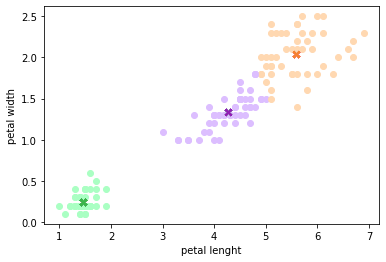

Apricot cluster centroid movement: -4.517080334576207e-05 -4.178796786824535e-06
Mint cluster centroid movement: 5.442491223384138e-05 -6.418032103550075e-06
Lavender cluster centroid movement: 0.00011937583882448699 5.40785829122592e-05


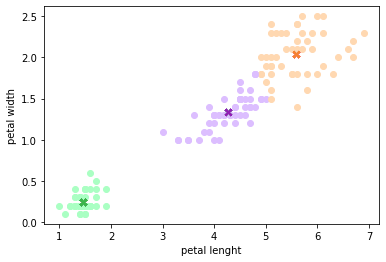

Apricot cluster centroid movement: -4.2260469709454185e-05 -3.909558872638996e-06
Mint cluster centroid movement: 5.090270260499352e-05 -6.002677195526829e-06
Lavender cluster centroid movement: 0.00011168904946035063 5.059638182322579e-05


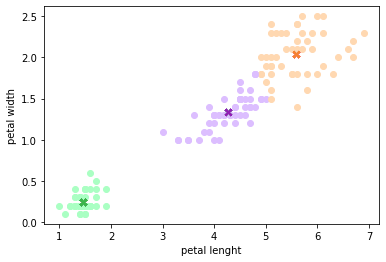

Apricot cluster centroid movement: -3.962262504408898e-05 -3.665529189955663e-06
Mint cluster centroid movement: 4.771169532968855e-05 -5.626379167456008e-06
Lavender cluster centroid movement: 0.00010472154793439437 4.744002612624976e-05


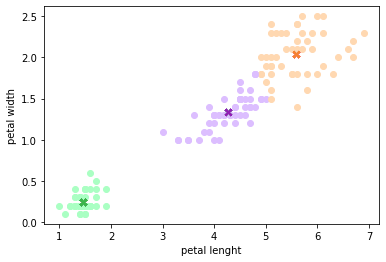

Apricot cluster centroid movement: -3.722428203989381e-05 -3.4436560487627332e-06
Mint cluster centroid movement: 4.4811627349261585e-05 -5.284390018678309e-06
Lavender cluster centroid movement: 9.838630607506005e-05 4.457009109137822e-05


In [15]:
x_first_array = ()
y_first_array = ()
x_second_array = ()
y_second_array = ()
x_third_array = ()
y_third_array = ()

while(True):
    for petal in petal_len_width:
        dist_first = math.sqrt(pow(r1[0] - petal[0], 2) + pow(r1[1] - petal[1], 2))
        dist_second = math.sqrt(pow(r2[0] - petal[0], 2) + pow(r2[1] - petal[1], 2))
        dist_third = math.sqrt(pow(r3[0] - petal[0], 2) + pow(r3[1] - petal[1], 2))
        if dist_first < dist_second and dist_first < dist_third:
            plt.scatter(petal[0], petal[1], marker='o', c='#ffd8b1')
            x_first_array = np.append(x_first_array, petal[0])
            y_first_array = np.append(y_first_array, petal[1])
        elif dist_second < dist_first and dist_second < dist_third:
            plt.scatter(petal[0], petal[1], marker='o', c='#dcbeff')
            x_second_array = np.append(x_second_array, petal[0])
            y_second_array = np.append(y_second_array, petal[1])
        else:
            plt.scatter(petal[0], petal[1], marker='o', c='#aaffc3')
            x_third_array = np.append(x_third_array, petal[0])
            y_third_array = np.append(y_third_array, petal[1])
        plt.scatter(r1[0], r1[1], marker='x',c='#f58231')
        plt.scatter(r2[0], r2[1], marker='x', c='#911eb4')
        plt.scatter(r3[0], r3[1], marker='x', c='#3cb44b')
    plt.ylabel('petal width')
    plt.xlabel('petal lenght')
    plt.show()

    new_x_first = sum(x_first_array) / len(x_first_array)
    new_y_first = sum(y_first_array) / len(y_first_array)
    new_x_second = sum(x_second_array) / len(x_second_array)
    new_y_second = sum(y_second_array) / len(y_second_array)
    new_x_third = sum(x_third_array) / len(x_third_array)
    new_y_third = sum(y_third_array) / len(y_third_array)

    print("Apricot cluster centroid movement:", r1[0] - new_x_first, r1[1] - new_y_first)
    print("Mint cluster centroid movement:", r2[0] - new_x_second, r2[1] - new_y_second)
    print("Lavender cluster centroid movement:", r3[0] - new_x_third, r3[1] - new_y_third)
    if  ((r1[0] - new_x_first < 0.001 and r1[1] - new_y_first < 0.001) 
        and (r2[0] - new_x_second < 0.001 and r2[1] - new_y_second < 0.001) 
        and (r3[0] - new_x_third < 0.001 and r3[1] - new_y_third < 0.001)):
        print("iteration finished")
        break
    
    r1=(new_x_first, new_y_first)
    r2=(new_x_second, new_y_second)
    r3=(new_x_third, new_y_third)